# A Convolução Transposta

**[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)**

## Matriz recirculante

### Convolução implementada com matriz recirculante

A convolução pode ser implementada como uma camada linear ($y = C x$) conforme ilustrado na figura:

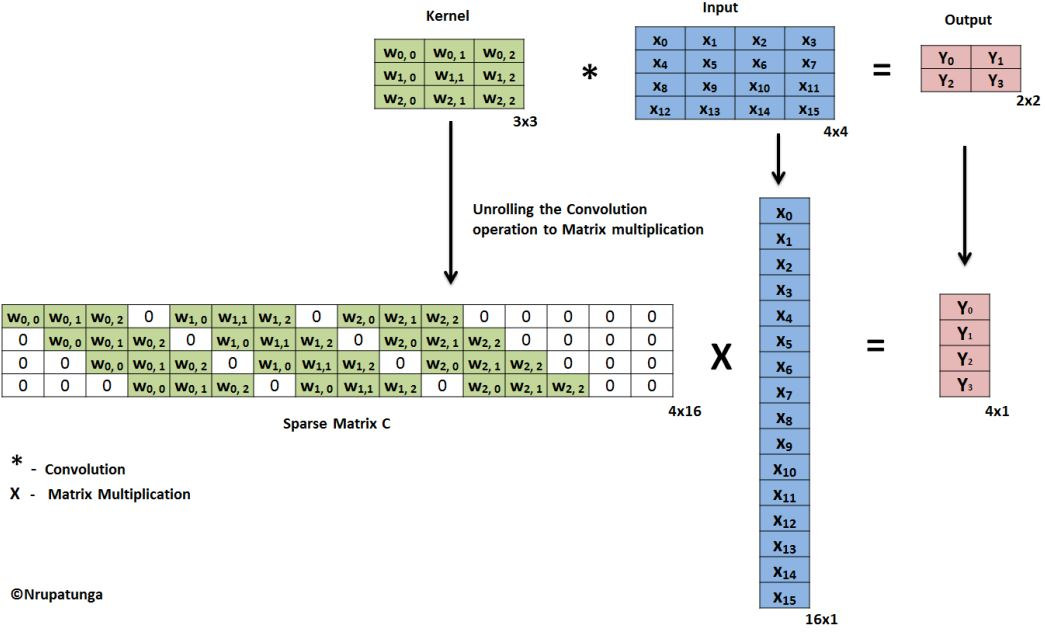

#### Convolução -- cálculo das dimensões da saída


$$o = \left \lfloor \frac{i + 2 p - k}{s} \right \rfloor + 1, \text{onde:}$$

$$o: \text{output size} \\
i: \text{input size} \\
p: \text{padding} \\
k: \text{kernel size} \\
s: \text{stride}$$

### Convolução transposta via matriz recirculante

A operação inversa pode ser implementada utilizando-se a transposta da matriz $x = C^T y$:

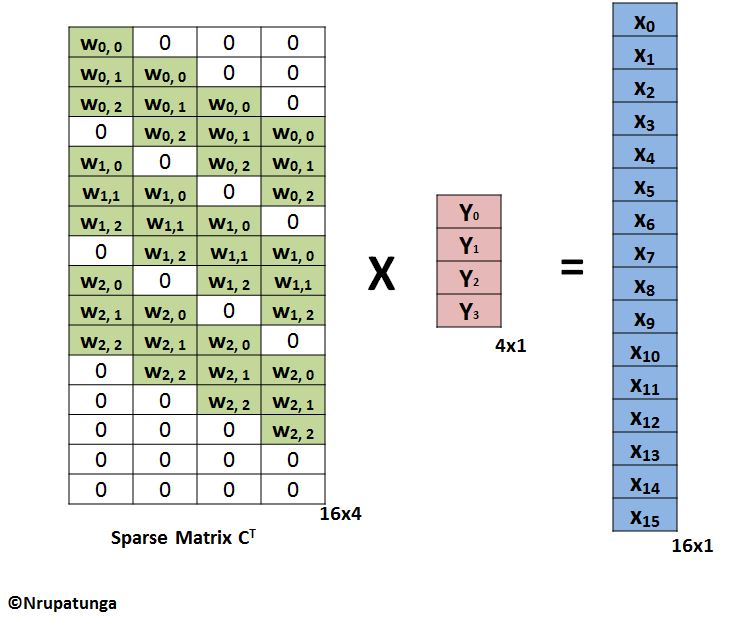

#### Convolução transposta -- cálculo das dimensões da saída

$$o^{'} = s (i^{'} - 1) + a + k + 2 p$$

In [1]:
import torch, numpy as np

In [2]:
a = torch.round(torch.rand(1, 1, 3, 4) * 3)
b = torch.ones(1, 1, 2, 2)
module_conv01 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), bias=False)
module_conv01.weight.data = b
module_conv02 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1, 1), bias=False, padding=(1, 1))
module_conv02.weight.data = torch.ones(1, 1, 1, 1)
module_conv03 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), bias=False, padding=(1, 1))
module_conv03.weight.data = b
module_dcnv01 = torch.nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=(3, 3), bias=False)
module_dcnv01.weight.data = b

c = module_conv01(torch.autograd.Variable(a)).data
c_padded = module_conv02(torch.autograd.Variable(c)).data
d = module_dcnv01(torch.autograd.Variable(c)).data
e = module_conv03(torch.autograd.Variable(c)).data

print(f'a:{a}', end='\n\n')
print(f'b:{b}', end='\n\n')
print(f'c = a ✻ b:   (torch.nn.Conv2d){c}', end='\n\n')
print(f'd = c ✻ b:   (torch.nn.ConvTranspose2d){d}', end='\n\n')
print(f'1x1 padded c:{c_padded}', end='\n\n')
print(f'e = c ✻ b:   (torch.nn.Conv2d padding=(1, 1)){e}', end='\n\n')

a:
(0 ,0 ,.,.) = 
  3  1  0  1
  0  0  0  1
  2  2  2  1
[torch.FloatTensor of size 1x1x3x4]


b:
(0 ,0 ,.,.) = 
  1  1
  1  1
[torch.FloatTensor of size 1x1x2x2]


c = a ✻ b:   (torch.nn.Conv2d)
(0 ,0 ,.,.) = 
  4  1  2
  4  4  4
[torch.FloatTensor of size 1x1x2x3]


d = c ✻ b:   (torch.nn.ConvTranspose2d)
(0 ,0 ,.,.) = 
   4   5   3   2
   8  13  11   6
   4   8   8   4
[torch.FloatTensor of size 1x1x3x4]


1x1 padded c:
(0 ,0 ,.,.) = 
  0  0  0  0  0
  0  4  1  2  0
  0  4  4  4  0
  0  0  0  0  0
[torch.FloatTensor of size 1x1x4x5]


e = c ✻ b:   (torch.nn.Conv2d padding=(1, 1))
(0 ,0 ,.,.) = 
   4   5   3   2
   8  13  11   6
   4   8   8   4
[torch.FloatTensor of size 1x1x3x4]


